<a href="https://colab.research.google.com/github/AjayKadoula/Mtech_Lab_1/blob/main/abc_artificial_bee_colony_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Bee Colony Algorithm (ABC)**

In computer science and operations research, the artificial bee colony algorithm (ABC) is an optimization algorithm based on the intelligent foraging behaviour of honey bee swarm, proposed by Karaboga in 2005.

In the ABC algorithm, there are three types of bees: employed bees, onlooker bees, and scout bees. The employed bees search food around the food source in their memory; meanwhile they share the information of these food sources to the onlooker bees. The onlooker bees tend to select good food sources from those found by the employed bees. The food source that has higher quality (fitness) will have a large chance to be selected by the onlooker bees than the one of lower quality. The scout bees are translated from a few employed bees, which abandon their food sources and search new ones

In the ABC algorithm, the first half of the swarm consists of employed bees, and the second half constitutes the onlooker bees.

The number of employed bees or the onlooker bees is equal to the number of solutions in the swarm. The ABC generates a randomly distributed initial population of SN solutions (food sources), where SN denotes the swarm size.

Let  Xi={xi,1,xi,2,…,xi,n}  represent the  ith  solution in the swarm, Where  n is the dimension size. Each employed bee  Xi generates a new candidate solution  Vi  in the neighborhood of its present position as equation below:

Vik=Xik+Φik×(Xik−Xjk) 

Where  Xj  is a randomly selected candidate solution ( i≠j ),  k  is a random dimension index selected from the set  {1,2,…,n}  , and  Φik  is a random number within  [−1,1] . Once the new candidate solution  Vi  is generated, a greedy selection is used. If the fitness value of  Vi  is better than that of its parent  Xi , then update  Xi  with  Vi ; otherwise keep  Xi  unchanged. After all employed bees complete the search process; they share the information of their food sources with the onlooker bees through waggle dances. An onlooker bee evaluates the nectar information taken from all employed bees and chooses a food source with a probability related to its nectar amount. This probabilistic selection is really a roulette wheel selection mechanism which is described as equation below:

Pi=fiti/∑jfitj 

Where  fiti  is the fitness value of the  ith solution in the swarm. As seen, the better the solution  i , the higher the probability of the  ith food source selected. If a position cannot be improved over a predefined number (called limit) of cycles, then the food source is abandoned. Assume that the abandoned source is  Xi , and then the scout bee discovers a new food source to be replaced with  ith  as equation below:

Xik=lbj+rand(0,1)×(ubj−lbj) 

Where  rand(0,1)  is a random number within [0,1]  based on a normal distribution and  lb,ub , are lower and upper boundaries of the  ith  dimension, respectively.


**Population** - the total number of sampling points of your objective function per iteration

**Bee** - a single sampling point

**Food** - the value of the objective function at the sampling point.

Scout Bees simply randomly probe the search space within bounds, and worker bees perform local optimisation around the current best solutions.



-0.5065308163532873


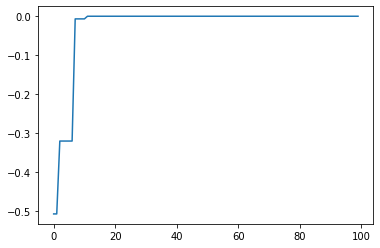

In [1]:

import random
import matplotlib.pyplot as plt


# optimize y = x ^ 2 for x in [-500, 500]

def find_max_index(my_list):
    index = 0
    max_value = my_list[index]
    for i in range(len(my_list)):
        if my_list[i] > max_value:
            max_value = my_list[i]
            index = i
    return index

N_w = 50    # number of workers
N_s = 10    # number of scouts
N_all = N_w + N_s   # number of all the bees
max_limit = 10
max_opt_iter = 100
pos_list = []
fitness_list = []
limit_list = []
opt_fitness_list = []

# initialization
for i in range(N_all):
    pos = 1000*(random.random()-0.5)
    pos_list.append(pos)
    fitness = -pos * pos
    fitness_list.append(fitness)
    limit_list.append(0)


index = find_max_index(fitness_list)
g_best_pos = pos_list[index]
g_best_fitness = fitness_list[index]

print(g_best_fitness)
# start optimization
for opt_iter in range(max_opt_iter):
    #print(opt_iter)
    for i in range(N_w):
        # choose a neighbour
        neigh_index = random.randint(0, N_all - 1)
        while neigh_index == i:
            neigh_index = random.randint(0, N_all - 1)

        # calculate new pos
        temp_pos = pos_list[i] + 2*(random.random()-0.5)*(pos_list[neigh_index] - pos_list[i])

        # bound new pos
        if temp_pos > 500:
            temp_pos = 500
        if temp_pos < -500:
            temp_pos = -500

        # calculate fitness
        temp_fitness = -temp_pos * temp_pos

        # update self fitness and pos
        if temp_fitness > fitness_list[i]:
            fitness_list[i] = temp_fitness
            pos_list[i] = temp_pos
            limit_list[i] = 0
        else:
            limit_list[i] = limit_list[i] + 1

        if limit_list[i] > max_limit:
            pos_list[i] = 1000*(random.random()-0.5)

    for i in range(N_w, N_w+N_s):
        # choose a new pos
        pos_list[i] = 1000 * (random.random() - 0.5)

        # calculate fitness
        fitness_list[i] = -pos_list[i] * pos_list[i]

    # update global best pos
    index = find_max_index(fitness_list)
    if fitness_list[index] > g_best_fitness:
        g_best_pos = pos_list[index]
        g_best_fitness = fitness_list[index]

    opt_fitness_list.append(g_best_fitness)

x = range(max_opt_iter)
plt.plot(x, opt_fitness_list)
plt.show()